# SPARSIZING.ipnyb
##### Edgar Hernandez | Jun 28, 2025
The purpose of this journal is to serve as:
1. Practice to using Python
2. Extension of sizing calculations done originally in excel

Perhaps is best to leave this at this

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Design Conditions
mtow = 0.4  # Maximum Takeoff Weight, kg
n = 2  # load factor
fs = 1.5  # safety factor
g = 9.81  # acceleration due to gravity, m/s^2

# Aircraft geometry
b = 0.762   # wingspan, m
c = 0.42    # chord length, m
t = c*0.12  # wing thickness, m
l_root = 0.1 # root length, m
b_sw = 1/2*(b-l_root)  # semi-wing span, m

num_sections = 10  # number of sections along the semi-wing span for analysis

# Printing current design conditions and geometry
print(f"Design Conditions:\n"
      f"Maximum Takeoff Weight (MTOW): {mtow} kg\n"
      f"Load Factor (n): {n}\n"
      f"Safety Factor (fs): {fs}\n")

print(f"\nAircraft Geometry:\n"
      f"Wingspan: {b} m\n"
      f"Semi-Wing Span: {b_sw} m\n"
      f"Chord Length: {c} m\n"
      f"Wing Thickness: {t:.6f} m\n")


Design Conditions:
Maximum Takeoff Weight (MTOW): 0.4 kg
Load Factor (n): 2
Safety Factor (fs): 1.5


Aircraft Geometry:
Wingspan: 0.762 m
Semi-Wing Span: 0.331 m
Chord Length: 0.42 m
Wing Thickness: 0.050400 m



### Structural Configurations
Here the different structural configurations are proposed.
There are two main parts of the configurations:
1. Stress absorbing:
Spar caps and stringers are those absorbing the bending stress
2. Shear absorbing:
The shear web absorbs the shear from the skins

The neutral axis represented in the second integral about z, is that of the chord line of the airfoil. Here the airfoil is being represented as an ellipse.

The structural configurations are as follows:
1. 

In [34]:
# Balsa wood properties
rho_balsa = 150  # mass density, kg/m^3
sig_balsa = 1.6*10**5 * rho_balsa  # ultimate tensile strength, Pa

y_bend = t/2  # location of maximum bending stress, m

# Sparcap: 2x/8" balsa stocks
a_sc = 2 * (1/8 /39.37) **2  # cross-sectional area, m^2
Iz_sc = 1/12 * a_sc **2 + a_sc*(y_bend)**2 # second integral, m^4
print(f"Inertia of each spar cap: {Iz_sc} m^4")

# Shear web: 1/16" thick balsa 
a_sw1 = 1/16 /39.37 * t  # shear web cross-sectional area, m^2
Iz_sw1 = 1/12 * a_sw1 **2  # shear web second integral, m^4
print(f"Inertia of shear web: {Iz_sw1} m^4")

# Stringer 1: 1/8" balsa stock located 1/3 from the chord line to top of the wing
a_stringer1 = 1/8 /39.37 **2  # cross-sectional area, m^2
Iz_stringer1 = 1/12 * a_stringer1 **2  + a_stringer1*(y_bend*1/3)**2 # second integral, m^4
print(f"Inertia of stringer 1: {Iz_stringer1} m^4")

# Stringer 2: 1/8" balsa stock located 2/3 from the chord line to top of the wing
a_stringer2 = a_stringer1  # cross-sectional area, m^2
Iz_stringer2 = 1/12 * a_stringer2 **2 + a_stringer2*(y_bend*2/3)**2 # second integral, m^4
print(f"Inertia of stringer 2: {Iz_stringer2} m^4")


# Evaluating inertias of each configuration
# Configuration 1: shear web, no spar caps, no stringers
Iz_config1 = Iz_sw1  # total second moment of inertia, m^4
print(f"\nInertia of configuration 1: {Iz_config1} m^4")

# Configuration 2: shear web, no spar caps, only stringer 2
Iz_config2 = Iz_sw1 + Iz_stringer2  # total second moment of inertia, m^4
print(f"Inertia of configuration 2: {Iz_config2} m^4")

# Configuration 3: shear web, no spar caps, stringers 1 and 2
Iz_config3 = Iz_sw1 + Iz_stringer1 + Iz_stringer2  # total second moment of inertia, m^4
print(f"Inertia of configuration 3: {Iz_config3} m^4")

# Configuration 4: shear web, 1 spar cap, stringers 1 and 2
Iz_config4 = Iz_sc + Iz_sw1 + Iz_stringer1 + Iz_stringer2  # total second moment of inertia, m^4
print(f"Inertia of configuration 4: {Iz_config4} m^4")

# Configuration 5: shear web, 2 spar caps, stringers 1 and 2
Iz_config5 = 2 * Iz_sc + Iz_sw1 + Iz_stringer1 + Iz_stringer2  # total second moment of inertia, m^4
print(f"Inertia of configuration 5: {Iz_config5} m^4")


Inertia of each spar cap: 1.2837124684070003e-08 m^4
Inertia of shear web: 5.334688088731015e-10 m^4
Inertia of stringer 1: 6.232306299162112e-09 m^4
Inertia of stringer 2: 2.3303308183101364e-08 m^4

Inertia of configuration 1: 5.334688088731015e-10 m^4
Inertia of configuration 2: 2.3836776991974467e-08 m^4
Inertia of configuration 3: 3.006908329113658e-08 m^4
Inertia of configuration 4: 4.290620797520658e-08 m^4
Inertia of configuration 5: 5.5743332659276585e-08 m^4


### Cantilever Analysis
This analysis is where one half of the wing (*i.e semi-wing*), not including the 'root' is taken and analyzed as a cantilever beam. 

The reactive moment and shear are found at the pinned section, then moments and shears are evaluated at different points of the semi-wing (*The semi-wing is sectioned off dependent on the value of num_sections*).

Finally, the lift distribution is of rectangular, so results may be conservative.


ANALYSIS RESULTS (semi-wing)

Design Conditions:
maximum lift of 5.114 Newtons
rectangular lift distribution, w(x) = 15.45 N/m

Section 1 (x=0.00 m)
Shear force: -5.11 N
Moment: -0.85 N*m

Section 2 (x=0.04 m)
Shear force: -4.55 N
Moment: -0.67 N*m

Section 3 (x=0.07 m)
Shear force: -3.98 N
Moment: -0.51 N*m

Section 4 (x=0.11 m)
Shear force: -3.41 N
Moment: -0.38 N*m

Section 5 (x=0.15 m)
Shear force: -2.84 N
Moment: -0.26 N*m

Section 6 (x=0.18 m)
Shear force: -2.27 N
Moment: -0.17 N*m

Section 7 (x=0.22 m)
Shear force: -1.70 N
Moment: -0.09 N*m

Section 8 (x=0.26 m)
Shear force: -1.14 N
Moment: -0.04 N*m

Section 9 (x=0.29 m)
Shear force: -0.57 N
Moment: -0.01 N*m

Section 10 (x=0.33 m)
Shear force: -0.00 N
Moment: -0.00 N*m


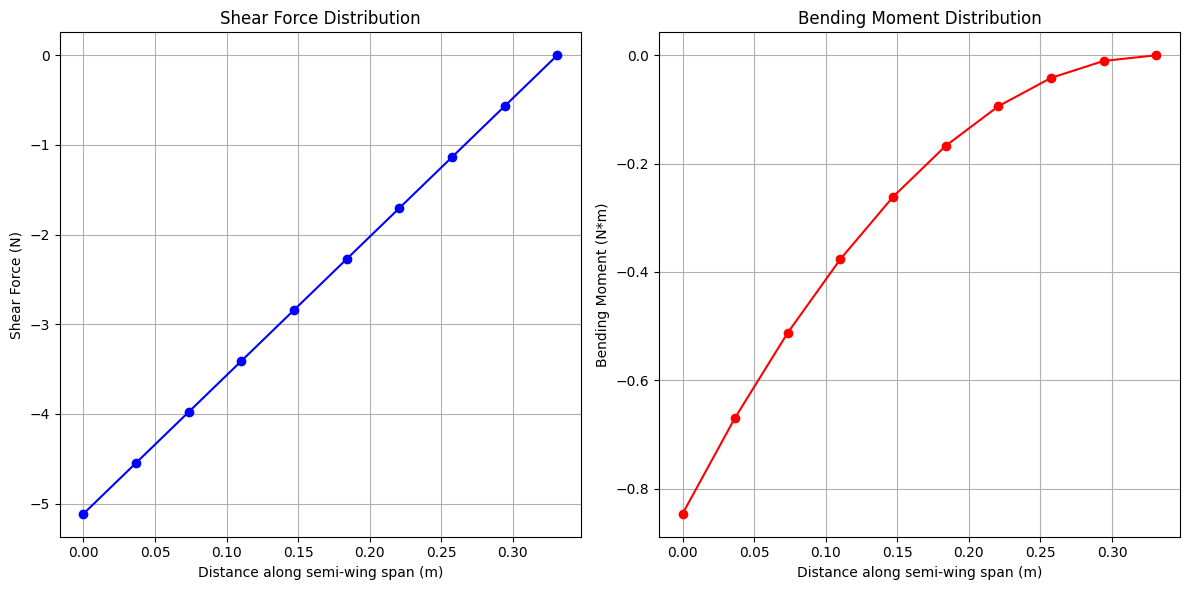

In [35]:
# Calculating maximum lift and lift distribution for semi-wing
L_sw = mtow * n * fs * g * b_sw/b # N
w_sw = L_sw / b_sw  # N/m
# Printing results of initial analysis
print("ANALYSIS RESULTS (semi-wing)")
print("\nDesign Conditions:")
print(f"maximum lift of {L_sw:.3f} Newtons")
print(f"rectangular lift distribution, w(x) = {w_sw:.2f} N/m")

# Calculate the moment and shear force for each section
x = np.linspace(0, b_sw, num_sections) # x-coords along the semi-wing span of each section
w = np.ones(num_sections) * w_sw  # Rectangular lift distribution
M = np.ones(num_sections)   # Moment at each section
V = np.ones(num_sections)   # Shear force at each section
for i in range(num_sections):
    # print(i) # me trying to figure out how to loop in python
    if i == 0:
        # Evaluating shear and moment at the root
        V[i] = -L_sw  # Shear force at the root
        M[i] = -L_sw * b_sw/2  # Moment at the root
    else: 
        # Shear at each point, linearly decreasing from root to tip
        V[i] = -L_sw * (1 - x[i]/b_sw)  # Shear force, N
        # Moment at each point, dM/dx = V
        M[i] = 1/2*V[i] * (b_sw-x[i])   # Moment, N*m
    # Printing results for each section
    print() # print absolutely nothing, thanks
    print(f"Section {i+1} (x={x[i]:.2f} m)")
    print(f"Shear force: {V[i]:.2f} N")
    print(f"Moment: {M[i]:.2f} N*m")

# Plotting shear and moment diagrams
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, V, marker='o', color='blue')
plt.title('Shear Force Distribution')
plt.xlabel('Distance along semi-wing span (m)')
plt.ylabel('Shear Force (N)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, M, marker='o', color='red')
plt.title('Bending Moment Distribution')
plt.xlabel('Distance along semi-wing span (m)')
plt.ylabel('Bending Moment (N*m)')
plt.grid()

plt.tight_layout()
plt.show()


### Spar Cap and stringers sizing
Here the assumption that the spar caps shall absorb the bending stress at each section is made. 
The minimum inertia needed from the balsa is calculated and compared to the inertias of each configuration

In [39]:
# Evaluating the minimum second inertia needed to withstand the bending moment at each section
Iz_min = np.ones(num_sections)  # Initialize array for minimum inertia
for i in range(num_sections):
    print(f"Section {i+1} (x={x[i]:.2f} m):")
    # Calculating the minimum second moment of inertia required at each section
    Iz_min[i] = abs(M[i] * y_bend / (sig_balsa * fs))
    print(f"Minimum inertia needed is {Iz_min[i]} m^4")   

    # Comparing minimum inertia needed to each configuration
    # Beginning with configuration 1, if the configuration meets the criteria, then this configuration
    # is used, if not then move on to the next configurations
    if Iz_config1 > Iz_min[i]:
        print(f"Configuration 1 meets the criteria with an inertia of {Iz_config1} m^4.")
    elif Iz_config2 > Iz_min[i]:
        print(f"Configuration 2 meets the criteria. with an inertia of {Iz_config2} m^4.")
    elif Iz_config3 > Iz_min[i]:
        print(f"Configuration 3 meets the criteria. with an inertia of {Iz_config3} m^4.")
    elif Iz_config4 > Iz_min[i]:
        print(f"Configuration 4 meets the criteria. with an inertia of {Iz_config4} m^4.")
    elif Iz_config5 > Iz_min[i]:
        print(f"Configuration 5 meets the criteria. with an inertia of {Iz_config5} m^4.")
    else:
        print("None of the configurations meet the criteria.")

    print()  # lonely line that no one will ever notice
        


Section 1 (x=0.00 m):
Minimum inertia needed is 5.924058165354331e-10 m^4
Configuration 2 meets the criteria. with an inertia of 2.3836776991974467e-08 m^4.

Section 2 (x=0.04 m):
Minimum inertia needed is 4.68073731583552e-10 m^4
Configuration 1 meets the criteria with an inertia of 5.334688088731015e-10 m^4.

Section 3 (x=0.07 m):
Minimum inertia needed is 3.583689507436571e-10 m^4
Configuration 1 meets the criteria with an inertia of 5.334688088731015e-10 m^4.

Section 4 (x=0.11 m):
Minimum inertia needed is 2.6329147401574806e-10 m^4
Configuration 1 meets the criteria with an inertia of 5.334688088731015e-10 m^4.

Section 5 (x=0.15 m):
Minimum inertia needed is 1.828413013998251e-10 m^4
Configuration 1 meets the criteria with an inertia of 5.334688088731015e-10 m^4.

Section 6 (x=0.18 m):
Minimum inertia needed is 1.1701843289588807e-10 m^4
Configuration 1 meets the criteria with an inertia of 5.334688088731015e-10 m^4.

Section 7 (x=0.22 m):
Minimum inertia needed is 6.58228685039